<a href="https://colab.research.google.com/github/zilavalencia/ChungaraVZila-IA-SIS420/blob/main/Segundo%20Parcial/Parcial2_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

# Leer el conjunto de datos de entrenamiento
train_data = pd.read_csv("/content/drive/MyDrive/ia/pregunta1_2/train_dataset.csv", delimiter=",")

# Leer el conjunto de datos de prueba
test_data = pd.read_csv("/content/drive/MyDrive/ia/pregunta1_2/test_dataset.csv", delimiter=",")

In [5]:
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

In [6]:

# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_train_data = scaler.fit_transform(train_data.select_dtypes(include=[np.number]))
scaled_test_data = scaler.fit_transform(test_data.select_dtypes(include=[np.number]))

scaled_train_data
scaled_test_data


array([[-0.35669616,  0.59111183, -0.05481357, ..., -0.02597222,
        -0.15607634, -0.51681861],
       [ 0.05691196,  0.59111183,  0.73639599, ...,  0.04050711,
         1.89596878, -0.51681861],
       [-1.18391242,  1.67683673,  1.92321032, ...,  0.07374677,
        -0.19479417, -0.51681861],
       ...,
       [-0.35669616, -1.03747551, -1.2416279 , ..., -0.55780682,
        -0.50453683, -0.51681861],
       [-0.77030429,  0.04824939,  0.34079121, ...,  0.04050711,
        -0.19479417,  1.93491486],
       [-1.59752055,  1.67683673,  1.13200076, ...,  0.00726745,
        -0.33030658, -0.51681861]])

In [7]:
from sklearn.cluster import KMeans

# Definir el número de clusters deseado
num_clusters = 2  # Puedes ajustar este valor según tu conocimiento del problema o mediante técnicas como la "elbow method"

# Inicializar el modelo K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

# Aplicar K-Means a los datos de entrenamiento normalizados
kmeans.fit(scaled_train_data)

# Obtener las etiquetas de los clusters para los datos de entrenamiento
train_cluster_labels = kmeans.labels_

# También puedes predecir los clusters para los datos de prueba si es necesario
# test_cluster_labels = kmeans.predict(scaled_test_data)

# Verificar los resultados
print("Etiquetas de cluster para los datos de entrenamiento:")
print(train_cluster_labels)

# print("\nEtiquetas de cluster para los datos de prueba:")
# print(test_cluster_labels)

# Obtener los centroides de los clusters
centroids = kmeans.cluster_centers_

# Verificar los centroides
print("\nCentroides de los clusters:")
print(centroids)


Etiquetas de cluster para los datos de entrenamiento:
[0 0 0 ... 0 1 1]

Centroides de los clusters:
[[-3.27985120e-01  6.27189422e-01  6.19544484e-01  4.90600831e-01
   1.42961487e-01  1.53194889e-01 -7.07288262e-02 -7.59509071e-02
   2.20945964e-01  2.49831888e-01  1.21812282e-01 -7.02738795e-04
   3.30429472e-01 -3.41088692e-01  1.01378624e-02  5.91434107e-01
   2.94859691e-02  3.98674286e-01  1.22499410e-01  2.04803160e-01
   2.57013879e-01  1.00944302e-01  4.48243337e-01]
 [ 3.99452549e-01 -7.63852988e-01 -7.54542230e-01 -5.97501963e-01
  -1.74112565e-01 -1.86575809e-01  8.61405236e-02  9.25004874e-02
  -2.69089734e-01 -3.04269854e-01 -1.48354983e-01  8.55864447e-04
  -4.02429522e-01  4.15411368e-01 -1.23468863e-02 -7.20306647e-01
  -3.59109143e-02 -4.85544771e-01 -1.49191835e-01 -2.49429439e-01
  -3.13016789e-01 -1.22939903e-01 -5.45914838e-01]]


In [8]:

# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_train_data[np.random.choice(scaled_train_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("\nPredicciones de cluster para las nuevas muestras:")
print(y_pred)


Muestras seleccionadas:
[[ 0.90127169 -0.51042661 -0.84819836 -0.97163373 -0.02999845 -0.22026386
  -0.16133735 -0.16399576 -0.18145336 -1.44890491 -0.59790639  0.14074332
  -0.8182123   2.44272445 -0.46828991 -0.14316165 -0.21517609 -2.2030331
  -0.32323975 -0.45178518 -0.48105245 -0.52244324 -0.7618892 ]
 [-0.34215791  1.66647036 -0.0727891  -0.60708808  0.3711884   0.99478728
  -0.16133735 -0.16399576 -0.10815756 -0.41355928 -0.16191219 -0.43691804
  -0.77643087  1.00610353 -0.46828991 -0.14316165 -0.21517609  0.9698629
   0.30256371 -0.13239375 -0.17920031 -0.52244324  1.31252681]
 [ 2.55917782 -1.5988751  -1.235903   -0.32831788  0.3711884  -1.63782353
   6.19819276  6.09771878  0.47820885 -0.31002472  1.14607039 -0.95956404
  -1.08282807 -0.8409805  -0.18845621 -1.03686948 -0.21517609  0.06332119
  -0.16678889 -0.26015032 -0.46092897 -0.52244324 -0.7618892 ]
 [-0.34215791  0.03379763 -0.84819836 -0.42481525 -0.02999845 -0.22026386
  -0.16133735 -0.16399576 -0.91441137 -0.62062841

<h1> CALCULAMOS EL VALOR OPTIMO DE CLOUSTERS USANDO EL METODO DEL CODO Y EL METODO DE LA SILUETA</h1>

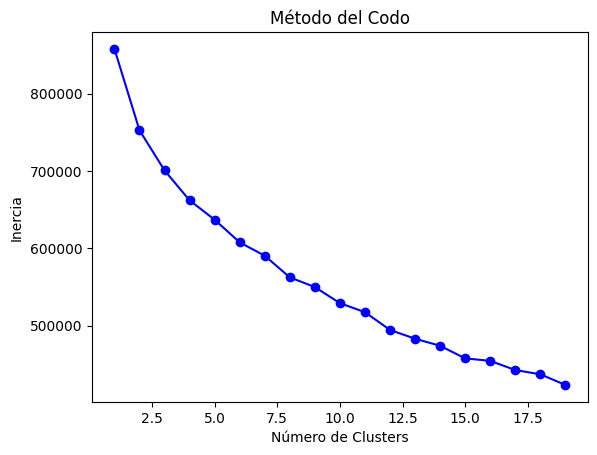

In [9]:
#METODO DEL CODO

# Tomar solo las características numéricas
none_y = scaled_train_data[:, :-1]

# Inicializar una lista para almacenar las inercias
inertias = []

# Rango de clusters a probar
k_range = range(1, 20)  # Prueba con un rango de 1 a 20 clusters

# Calcular la inercia para cada número de clusters en el rango especificado
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(none_y)
    inertias.append(kmeans.inertia_)

# Graficar la curva de inercia
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Encontrar el mejor número de clusters utilizando el método del codo
best_codo_index = np.argmin(inertias)
best_num_clusters_codo = best_codo_index + 1  # Sumamos 1 ya que comenzamos desde 1 cluster


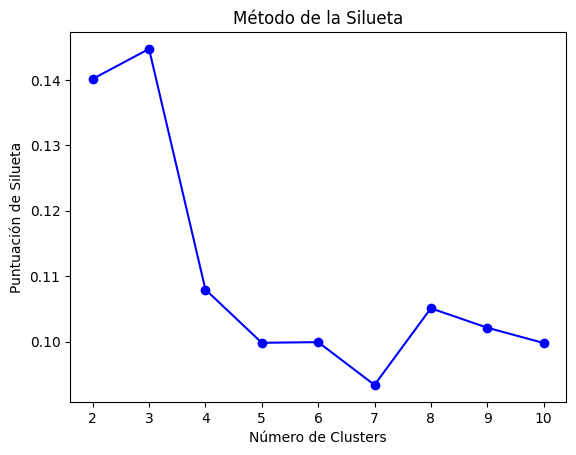

El número óptimo de clusters según la puntuación de silueta es: 3


In [10]:
#METODO DE LA SILUETA

# Inicializar una lista para almacenar las puntuaciones de silueta
silhouette_scores = []

# Rango de clusters a probar
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

# Calcular la puntuación de silueta para cada número de clusters en el rango especificado
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()

# Encontrar el mejor número de clusters utilizando la puntuación de silueta
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2  # Sumamos 2 ya que comenzamos desde 2 clusters

print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)


In [11]:
# Imprimir la cantidad de ejemplos en cada conjunto
print('-' * 80)
print(f"El 80% de ejemplos que serán para el entrenamiento son: {len(scaled_train_data)}")
print(f"El 20% de ejemplos que serán para el prueba son: {len(scaled_test_data)}")


--------------------------------------------------------------------------------
El 80% de ejemplos que serán para el entrenamiento son: 38984
El 20% de ejemplos que serán para el prueba son: 16708


## **eliminamos la y**

In [12]:
none_y

array([[-0.75663444,  0.57802188,  1.47802943, ...,  2.80600746,
         1.71240639,  1.91408353],
       [-2.00006404,  1.12224612,  3.4165526 , ..., -0.06851546,
        -0.19932379,  1.91408353],
       [ 0.07231863, -1.05465085, -0.0727891 , ..., 43.84780685,
         4.7510512 , -0.52244324],
       ...,
       [-0.34215791,  0.57802188,  3.02884797, ..., -0.13239375,
        -0.09870641,  1.91408353],
       [-0.34215791, -0.51042661, -0.84819836, ..., -0.22821118,
        -0.46092897, -0.52244324],
       [ 0.90127169,  1.12224612, -0.46049373, ..., -0.48372433,
        -0.48105245, -0.52244324]])

In [13]:
scaled_train_data

array([[-0.75663444,  0.57802188,  1.47802943, ...,  1.71240639,
         1.91408353,  1.31252681],
       [-2.00006404,  1.12224612,  3.4165526 , ..., -0.19932379,
         1.91408353, -0.7618892 ],
       [ 0.07231863, -1.05465085, -0.0727891 , ...,  4.7510512 ,
        -0.52244324, -0.7618892 ],
       ...,
       [-0.34215791,  0.57802188,  3.02884797, ..., -0.09870641,
         1.91408353,  1.31252681],
       [-0.34215791, -0.51042661, -0.84819836, ..., -0.46092897,
        -0.52244324,  1.31252681],
       [ 0.90127169,  1.12224612, -0.46049373, ..., -0.48105245,
        -0.52244324,  1.31252681]])

In [14]:
# KMeans clustering on training data
kmeans = KMeans(n_clusters=best_num_clusters, n_init=10, random_state=42)
kmeans.fit(scaled_train_data)
train_data['kmeans3'] = kmeans.labels_

# Este método ajusta el modelo K-Means utilizando el conjunto de datos X_train y
# Transformamos los datos de entrenamiento en distancias euclidianas a los centroides
X_digits_dist = kmeans.transform(scaled_train_data)


In [15]:
# Mostramos el número de ejemplos en cada grupo.
print(X_digits_dist.shape)
print(X_digits_dist)

(38984, 3)
[[ 9.14464343  7.62234528  5.39543897]
 [ 9.00690145  7.05196007  5.09849126]
 [71.31528961 71.36650901 70.88298662]
 ...
 [ 9.29187947  8.15418291  5.81771365]
 [ 7.69007261  3.59339983  5.23728173]
 [ 6.89347186  3.27429385  3.54704422]]


#Vemos la precision de los **clusters**

In [16]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=80, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(train_data)
silhouette_avg = silhouette_score(train_data, y_pred) # Calculamos el score de silueta del modelo
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.0951971515745616
